In [1]:
import pandas as pd
import numpy as np
import altair as alt
from pathlib import Path

In [20]:
def make_scatter(x, y, x_title, y_title, title):
    dots = alt.Chart(
    full_data, width=500, height=500, title=title
    ).mark_circle(size=50).encode(
        x=alt.X(
            x,
            title=x_title
        ),
        y=alt.Y(
            y,
            title=y_title
        ),
        color=alt.Color(
        "pos",
        legend=alt.Legend(
            title="Position"
            )
        ),
        tooltip=[
            alt.Tooltip("name", title="Player"),
            alt.Tooltip(x, title=x_title),
            alt.Tooltip(y, title=y_title),
            alt.Tooltip("pos", title="Position")
        ]
    )
    line = alt.Chart(
        pd.DataFrame({"x": [0, 200], "y": [0, 200]})
    ).mark_line(color="black", opacity=0.5).encode(
        x="x",
        y="y",
    )
    layer = alt.layer(dots, line)
    return layer

In [3]:
CUR_PATH = Path().resolve()

In [4]:
full_data = pd.read_csv(
    Path(CUR_PATH, "data", "adp_v_points.csv")
)

In [5]:
full_data.head()

,avg_pick,name,player_id,pos,team,adp_rank,pts,points_rank,rank_diff,proj_pts,proj_pts_rank,proj_rank_diff,points_rank_diff
0,1.4,Todd Gurley II,17683,RB,LAR,1,372.1,4.0,-3.0,325.3,1.0,0.0,-3.0
1,3.3,David Johnson,17442,RB,Ari,2,246.6,39.0,-37.0,323.5,2.0,0.0,-37.0
2,4.0,Ezekiel Elliott,17797,RB,Dal,3,329.1,12.0,-9.0,301.5,6.0,-3.0,-6.0
3,5.3,Saquon Barkley,18567,RB,NYG,4,385.8,2.0,2.0,280.8,15.0,-11.0,13.0
4,5.5,Antonio Brown,13934,WR,Pit,5,323.7,15.0,-10.0,321.9,3.0,2.0,-12.0


In [6]:
full_data["pos"].value_counts()

WR      68
RB      59
QB      23
TE      20
D/ST    15
K       15
Name: pos, dtype: int64

## ADP vs. Actual Points Rank

Correlation between ADP rank and actual points rank

In [7]:
np.corrcoef(full_data["adp_rank"], full_data["points_rank"])

array([[ 1.        ,  0.43587253],
       [ 0.43587253,  1.        ]])

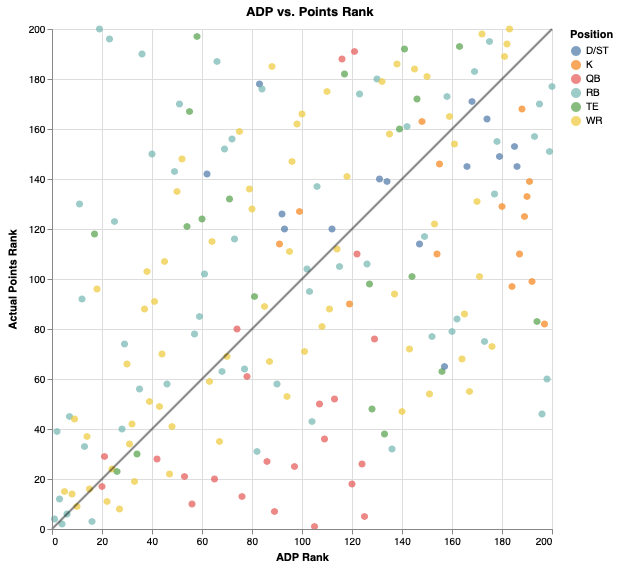

In [21]:
chart1 = make_scatter(
    "adp_rank", "points_rank", "ADP Rank", "Actual Points Rank", "ADP vs. Points Rank"
)
chart1

## ADP vs. Projected Points Rank

Correlation between ADP rank and projected points rank

In [9]:
np.corrcoef(full_data["adp_rank"], full_data["proj_pts_rank"])

array([[ 1.        ,  0.75260523],
       [ 0.75260523,  1.        ]])

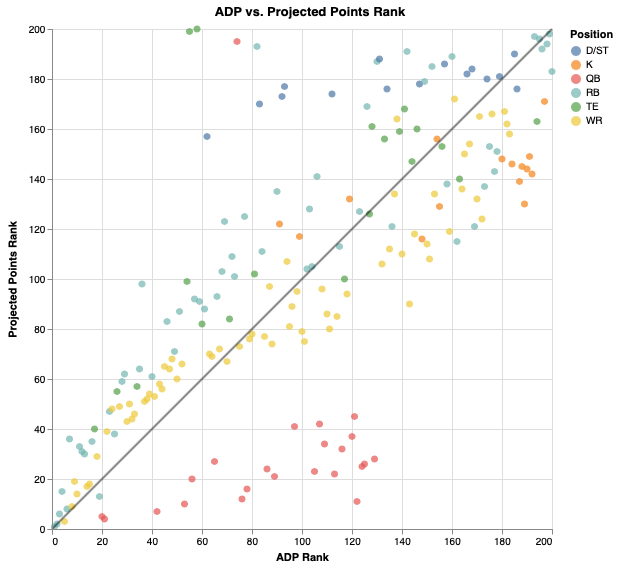

In [22]:
chart2 = make_scatter(
    "adp_rank", "proj_pts_rank", "ADP Rank", "Projected Points Rank", "ADP vs. Projected Points Rank"
)
chart2

## ADP by position

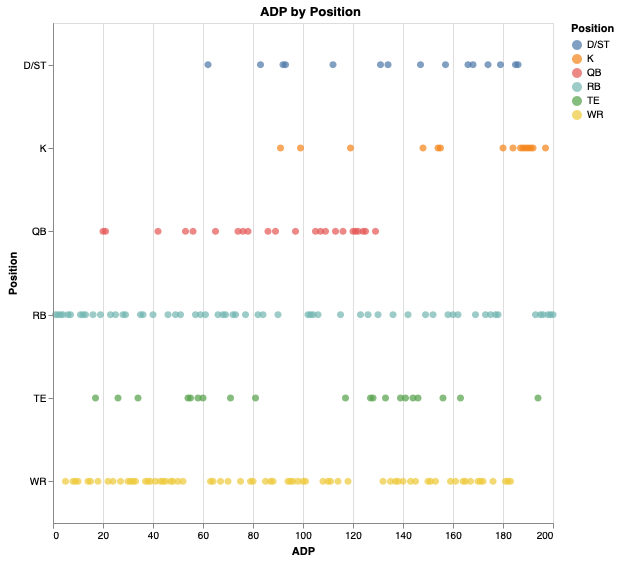

In [24]:
pos_chart = alt.Chart(
    full_data, width=500, title="ADP by Position", height=500
).mark_circle(size=50).encode(
    y=alt.Y("pos", title="Position"),
    x=alt.X("adp_rank", title="ADP"),
    color=alt.Color(
        "pos",
        legend=alt.Legend(
            title="Position"
        )
    ),
    tooltip=[
        alt.Tooltip("name", title="Player"),
        alt.Tooltip("adp_rank", title="ADP")
    ]
)
pos_chart

## Projected Points vs. Actial Points

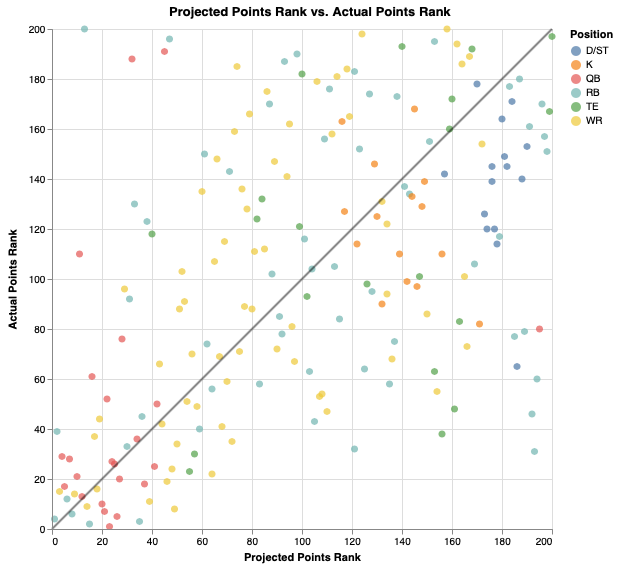

In [25]:
chart3 = make_scatter(
    "proj_pts_rank", "points_rank", "Projected Points Rank", "Actual Points Rank",
    "Projected Points Rank vs. Actual Points Rank"
)
chart3

In [13]:
chart3.save("chart3.svg")

WebDriverException: Message: 'chromedriver' executable needs to be in PATH. Please see https://sites.google.com/a/chromium.org/chromedriver/home
